In [19]:
import pandas as pd

from sklearn import datasets, tree, preprocessing, metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x,y, test_size=0.2)

In [20]:
data = datasets.load_breast_cancer()

print(data.target)
print(data.feature_names)
print(data.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [21]:
label_encoder = preprocessing.LabelEncoder()

In [22]:
df = pd.DataFrame(data.data, columns=data.feature_names).assign(Species=data['target_names'][data.target])
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Species
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


In [23]:
# assign x and y
x = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target


In [24]:
# X, y = datasets.load_breast_cancer(return_X_y=True)

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

[Text(0.46, 0.9166666666666666, 'X[22] <= 105.95\ngini = 0.462\nsamples = 455\nvalue = [165, 290]'),
 Text(0.26, 0.75, 'X[27] <= 0.159\ngini = 0.069\nsamples = 280\nvalue = [10, 270]'),
 Text(0.16, 0.5833333333333334, 'X[14] <= 0.003\ngini = 0.015\nsamples = 270\nvalue = [2, 268]'),
 Text(0.08, 0.4166666666666667, 'X[27] <= 0.098\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.04, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.12, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.24, 0.4166666666666667, 'X[21] <= 33.35\ngini = 0.007\nsamples = 266\nvalue = [1, 265]'),
 Text(0.2, 0.25, 'gini = 0.0\nsamples = 252\nvalue = [0, 252]'),
 Text(0.28, 0.25, 'X[1] <= 23.2\ngini = 0.133\nsamples = 14\nvalue = [1, 13]'),
 Text(0.24, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.32, 0.08333333333333333, 'gini = 0.0\nsamples = 13\nvalue = [0, 13]'),
 Text(0.36, 0.5833333333333334, 'X[21] <= 23.47\ngini = 0.32\nsamples = 10\nvalue = [8, 2]'),
 Text

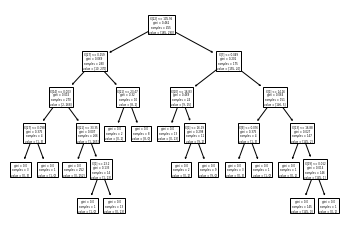

In [26]:

# Decision Tree Classifier
clfDTC = tree.DecisionTreeClassifier()
clfDTC = clfDTC.fit(x_train, y_train)
tree.plot_tree(clfDTC)

In [27]:
# Predict Data
y_pred_dtc = clfDTC.predict(x_test)

In [28]:
print("Accuracy     : ",accuracy_score(y_test, y_pred_dtc))
print("Precision    : ", metrics.precision_score(y_test, y_pred_dtc))
print("Recall       :", metrics.recall_score(y_test, y_pred_dtc))

Accuracy     :  0.8859649122807017
Precision    :  0.8970588235294118
Recall       : 0.9104477611940298


In [29]:
from id3.id3 import Id3Estimator
estimator = Id3Estimator()

In [30]:
estimator = estimator.fit(x_train, y_train)

In [35]:
y_pred_id3 = estimator.predict(x_test)

In [40]:
print("Accuracy     : ",accuracy_score(y_test, y_pred_id3))
print("Precision    : ", metrics.precision_score(y_test, y_pred_id3))
print("Recall       :", metrics.recall_score(y_test, y_pred_id3))

Accuracy     :  0.9122807017543859
Precision    :  0.9130434782608695
Recall       : 0.9402985074626866


In [41]:
# SVM
from sklearn import svm 
clfSVM = svm.SVC()

In [42]:
clfSVM.fit(x_train, y_train)

SVC()

In [43]:
y_pred_svm = clfSVM.predict(x_test)

In [44]:
print("Accuracy     : ",accuracy_score(y_test, y_pred_svm))
print("Precision    : ",metrics.precision_score(y_test, y_pred_svm))
print("Recall       : ",metrics.recall_score(y_test, y_pred_svm))

Accuracy     :  0.8859649122807017
Precision    :  0.8857142857142857
Recall       :  0.9253731343283582
